In [14]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

I am now making the null expt plots with nside=64 in the matlab script, then coarse gridding here to nside=64
in order to get rid of the strange axis gridding artifact

In [15]:
import healpy as hp
from matplotlib.collections import PolyCollection
nside=32 # change back to nside=32 for the HERA beams
npix = hp.nside2npix(nside)
#boundaries = hp.boundaries(nside,arange(npix))

def plot_hpix(hmap,counts,plttitle,cax,ax,cmapname,hidezalabels=False,thefontsize=14,contourcolor=[0,0,0]):
    boundaries = hp.boundaries(nside,arange(npix),nest=False)

    g = counts>0
    verts = swapaxes(boundaries[g,0:2,:],1,2)[:,:,::-1]
    coll = PolyCollection(verts, array=hmap[g], cmap=plt.get_cmap(cmapname), edgecolors='none',clim=cax,rasterized=True)
    ax.add_collection(coll)
    #ax.autoscale_view()
    fig.colorbar(coll, ax=ax)
    ax.set_title(plttitle)
    ax.set_axis_bgcolor('white')

    for radius_deg in [20,40,60,80]:
        r=sin(radius_deg*pi/180.)
        x = linspace(-r,r,100)
        #zacontourcolor=array([1.,1.,1.])*.75
        ax.plot(x,sqrt(r**2-x**2),'--',linewidth=2,color=contourcolor)
        ax.plot(x,-sqrt(r**2-x**2),'--',linewidth=2,color=contourcolor)
        if hidezalabels!=True:
            ax.text(-.07,-r-.05, str(radius_deg)+r'$^O$', fontsize=thefontsize,backgroundcolor='white')

    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal', 'datalim')
    
    
# use this for the null expt results
def plot_hpix_64to32(hmap64,counts64,plttitle,cax,ax,cmapname,hidezalabels=False,thefontsize=14,contourcolor=[0,0,0]):
    boundaries = hp.boundaries(nside,arange(npix),nest=False)

    hmap64 *= counts64 # counts64 is 0 or 1
    counts = hp.ud_grade(counts64,32)
    hmap = hp.ud_grade(hmap64,32)/counts
    
    g = counts>0
    verts = swapaxes(boundaries[g,0:2,:],1,2)[:,:,::-1]
    coll = PolyCollection(verts, array=hmap[g], cmap=plt.get_cmap(cmapname), edgecolors='none',clim=cax,rasterized=True)
    ax.add_collection(coll)
    #ax.autoscale_view()
    fig.colorbar(coll, ax=ax)
    ax.set_title(plttitle)
    ax.set_axis_bgcolor('white')

    for radius_deg in [20,40,60,80]:
        r=sin(radius_deg*pi/180.)
        x = linspace(-r,r,100)
        #zacontourcolor=array([1.,1.,1.])*.75
        ax.plot(x,sqrt(r**2-x**2),'--',linewidth=2,color=contourcolor)
        ax.plot(x,-sqrt(r**2-x**2),'--',linewidth=2,color=contourcolor)
        if hidezalabels!=True:
            ax.text(-.07,-r-.05, str(radius_deg)+r'$^O$', fontsize=thefontsize,backgroundcolor='white')

    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal', 'datalim')
    
def plot_slice():
    return

## null experiments

In [90]:
#d = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/jul13/unpolarized_beam_analysis_hera/'
d = '/Users/abrahamn/Documents/MIT/21cm/sat_cal/updates/orbcomm_beam_mapping/sat_passes_to_beams/unpolarized_beam_analysis_hera/'
null1 = genfromtxt(d+'null1_north_over_south_ratio_ew_ns_nside64.csv',delimiter=',')
null4 = genfromtxt(d+'null4_north_over_south_ratio_ew_ns_nside64.csv',delimiter=',')

In [91]:
null1.shape

(49152, 3)

(0, 5000)

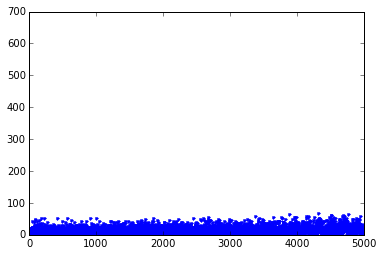

In [92]:
plt.plot(abs(null1[:,2]),'.')
plt.xlim([0,5000])

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


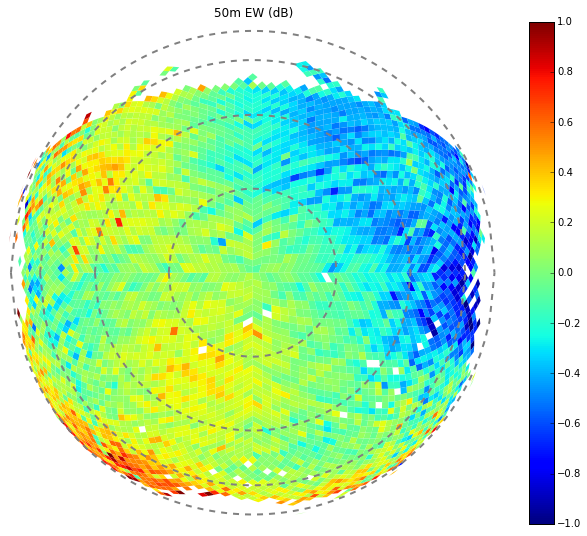

In [93]:
counts64 = (abs(null1[:,0])<1)*(null1[:,2]>0)+0.
hmap64 = null1[:,0]*counts64
counts = hp.ud_grade(counts64,32)
hmap = hp.ud_grade(hmap64,32)/counts

plt.clf()
fig, gridax = plt.subplots(1,1)
fig.set_size_inches((11,9))
plot_hpix(hmap,counts,'50m EW (dB)',cax,gridax,cm,hidezalabels=True,contourcolor=zacontourcolor)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/Library/Python/2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in divide
/Library/Python/2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less
/Library/Python/2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less
/Library/Python/2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


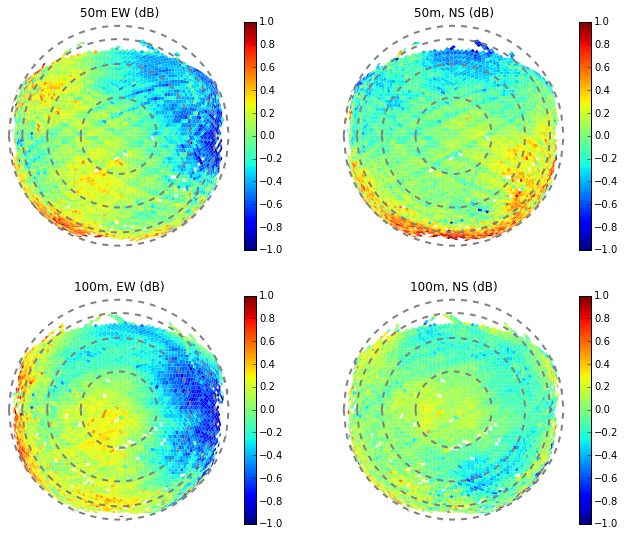

In [94]:
plt.clf()
fig, gridax = plt.subplots(2,2)
fig.set_size_inches((11,9))

cax=[-1,1]
cm = 'jet'
zacontourcolor = array([0,0,0])+.5
plot_hpix_64to32(null1[:,0],(abs(null1[:,0])<1)*(null1[:,2]),'50m EW (dB)',cax,gridax[0,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix_64to32(null1[:,1],(abs(null1[:,1])<1)*(null1[:,2]),'50m, NS (dB)',cax,gridax[0,1],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix_64to32(null4[:,0],(abs(null4[:,0])<1)*(null4[:,2]),'100m, EW (dB)',cax,gridax[1,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix_64to32(null4[:,1],(abs(null4[:,1])<1)*(null4[:,2]),'100m, NS (dB)',cax,gridax[1,1],cm,hidezalabels=True,contourcolor=zacontourcolor)

plt.savefig('null_expt_rel_beam_maps.pdf',bbox_inches='tight')

## dish experiments

In [16]:
# load measured beams
#d = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/jul13/unpolarized_beam_analysis_hera/'
d = '/Users/abrahamn/Documents/MIT/21cm/sat_cal/updates/orbcomm_beam_mapping/sat_passes_to_beams/unpolarized_beam_analysis_hera/'
dish2 = genfromtxt(d+'dish2_nside32_ew_ns.csv',delimiter=',')
dish2[isnan(dish2)] = 0
dish1 = genfromtxt(d+'dish1_nside32_ew_ns.csv',delimiter=',')
dish1[isnan(dish1)] = 0
dish4 = genfromtxt(d+'dish4_nside32_ew_ns.csv',delimiter=',')
dish4[isnan(dish4)] = 0

In [17]:
# load beam models
richbeamdir = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/sim_vis_with_orbcomm_hera_beams/rich_beam_models_11_23_2015/'
#davebeamdir = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/sim_vis_with_orbcomm_hera_beams/dave_beam_models_1_4_2016/'
davebeamdir = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/sim_vis_with_orbcomm_hera_beams/dave_beam_models_1_4_2016/half_inch_gap_fixed_alignment_problem/'

richbeam177_hp = 10*log10(genfromtxt(richbeamdir+'Beam_1375_nom_P1_healpix.txt'))
richbeam195_hp = 10*log10(genfromtxt(richbeamdir+'Beam_1375_18H_P1_healpix.txt'))
richbeam208_hp = 10*log10(genfromtxt(richbeamdir+'Beam_1375_30H_P1_healpix.txt'))

davebeam177_hp = 10*log10(genfromtxt(davebeamdir+'XRFB_4500_137o5_healpix.txt'))
davebeam195_hp = 10*log10(genfromtxt(davebeamdir+'XRFB_5000_137o5_healpix.txt'))
davebeam206_hp = 10*log10(genfromtxt(davebeamdir+'XRFB_5300_137o5_healpix.txt'))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


In [18]:
hp.nside2npix(64)

49152

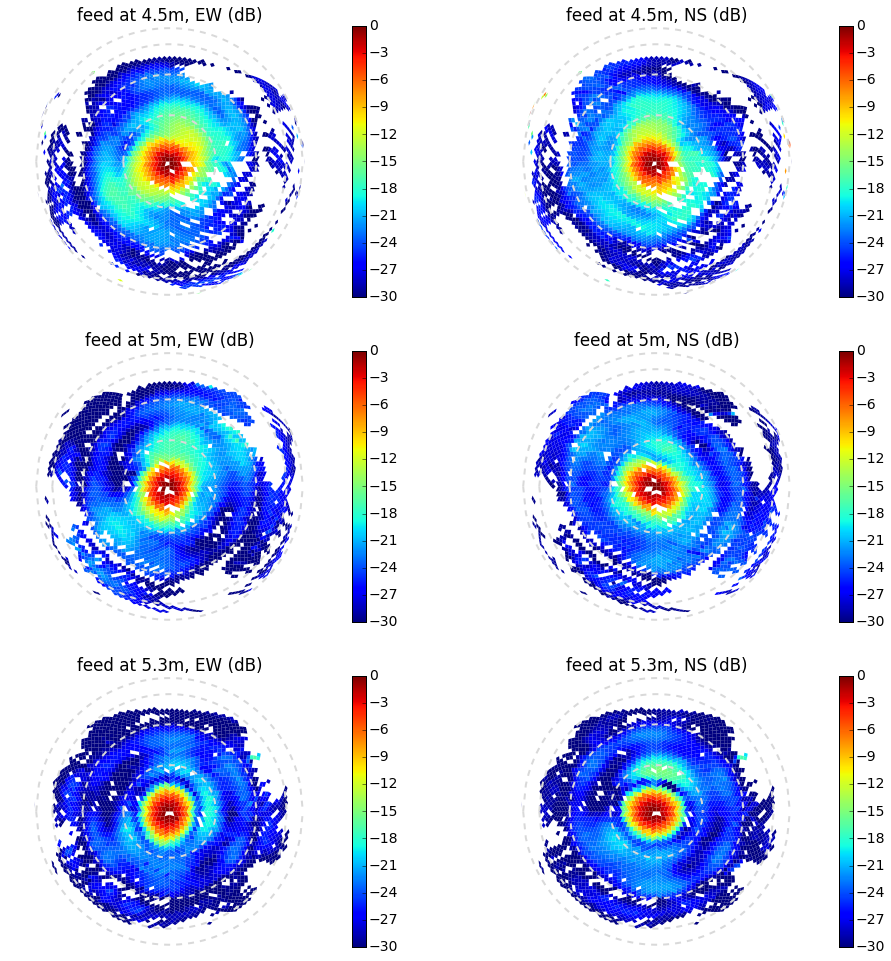

In [8]:
fig, gridax = plt.subplots(3,2)
fig.set_size_inches((16,16.5))

cax=[-30,0]
cm = 'jet'
zacontourcolor = array([0,0,0])+.85

matplotlib.rcParams.update({'font.size': 14})

plot_hpix(dish1[:,0],dish1[:,0]!=0,'feed at 4.5m, EW (dB)',cax,gridax[0,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish1[:,1],dish1[:,1]!=0,'feed at 4.5m, NS (dB)',cax,gridax[0,1],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish2[:,0],dish2[:,0]!=0,'feed at 5m, EW (dB)',cax,gridax[1,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish2[:,1],dish2[:,1]!=0,'feed at 5m, NS (dB)',cax,gridax[1,1],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish4[:,0],dish4[:,0]!=0,'feed at 5.3m, EW (dB)',cax,gridax[2,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish4[:,1],dish4[:,1]!=0,'feed at 5.3m, NS (dB)',cax,gridax[2,1],cm,hidezalabels=True,contourcolor=zacontourcolor)

plt.savefig('measured_beams_and_models_maps.pdf',bbox_inches='tight')

In [9]:
gridax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106036ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1041d8f50>]], dtype=object)

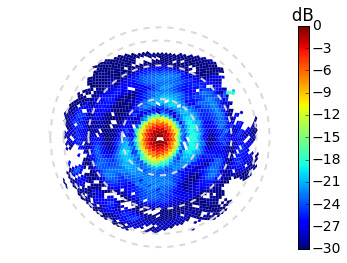

In [10]:
fig, gridax = plt.subplots(1,1)
fig.set_size_inches((5.5,4))

matplotlib.rcParams.update({'font.size': 14})

cax=[-30,0]
plot_hpix(dish4[:,0],dish4[:,0]!=0,'                                                     dB',cax,gridax,cm,hidezalabels=True,contourcolor=zacontourcolor)
plt.savefig('orbcomm_dish_beam_map_530cm_feed.pdf',bbox_inches='tight')

In [19]:
# maybe make azimuthally averaged slice plots?

za,az = hp.pix2ang(nside,arange(npix))
r=.02 # use 0.02 for the dish plots, 0.03 for the feed plots b/c data is sparser
g = logical_and(abs(sin(za)*cos(az))<r,sin(az)>0,za<pi/2) # EW
g2 = logical_and(abs(sin(za)*sin(az))<r,cos(az)>0,za<pi/2) # NS
g_neg = logical_and(abs(sin(za)*cos(az))<r,sin(az)<0,za<pi/2)
g2_neg = logical_and(abs(sin(za)*sin(az))<r,cos(az)<0,za<pi/2)

def plot_slice(hmap,counts,gax,polstr,addylabel=False,addxlabel=False,model=False,modelstyle='-',pltlabel='',swap=False,xlimits=[-55,55],ylimits=[-30,0]):
    if swap==True:
        if polstr=='ew':
            newpolstr='ns'
        if polstr=='ns':
            newpolstr='ew'
        polstr=newpolstr
        
    if polstr=='ew':
        col1='r'
        cut1name = 'E'
        col2='c'
        cut2name = 'H'
    elif polstr=='ns':
        col1='c'
        cut1name = 'H'
        col2='r'
        cut2name = 'E'
    if model==False:
        #gax.plot(180./pi*za[g*counts],hmap[g*counts],'o',markerfacecolor='none',markeredgecolor=col1)
        #gax.plot(-180./pi*za[g_neg*counts],hmap[g_neg*counts],'o',markerfacecolor='none',markeredgecolor=col1)
        #gax.plot(180./pi*za[g2*counts],hmap[g2*counts],'o',markerfacecolor='none',markeredgecolor=col2)
        #gax.plot(-180./pi*za[g2_neg*counts],hmap[g2_neg*counts],'o',markerfacecolor='none',markeredgecolor=col2)
        mkrsize=5
        gax.plot(180./pi*za[g*counts],hmap[g*counts],'o',markerfacecolor=col1,markeredgecolor='k',markersize=mkrsize)
        gax.plot(-180./pi*za[g_neg*counts],hmap[g_neg*counts],'o',markerfacecolor=col1,markeredgecolor='k',markersize=mkrsize)
        gax.plot(180./pi*za[g2*counts],hmap[g2*counts],'o',markerfacecolor=col2,markeredgecolor='k',markersize=mkrsize)
        gax.plot(-180./pi*za[g2_neg*counts],hmap[g2_neg*counts],'o',markerfacecolor=col2,markeredgecolor='k',markersize=mkrsize)
    else:
        lnwidth = 2
        gax.plot(180./pi*za[g*counts],hmap[g*counts],modelstyle+col1,linewidth=lnwidth,label=pltlabel+', '+cut1name)
        gax.plot(-180./pi*za[g_neg*counts],hmap[g_neg*counts],modelstyle+col1,linewidth=lnwidth)
        gax.plot(180./pi*za[g2*counts],hmap[g2*counts],modelstyle+col2,linewidth=lnwidth,label=pltlabel+', '+cut2name)
        gax.plot(-180./pi*za[g2_neg*counts],hmap[g2_neg*counts],modelstyle+col2,linewidth=lnwidth)
    if addylabel: gax.set_ylabel('dB')
    gax.set_ylim(ylimits)
    gax.set_xlim(xlimits)
    gax.grid()
    if addxlabel: gax.set_xlabel('zenith angle (deg)')

In [20]:
import scipy.special as sp
def plot_airy_beam_with_given_collecting_area(ax,Aeff): # in meters
    dishdiameter = sqrt(4.*Aeff/pi)
    
    z = linspace(-90,90)*pi/180.
    
    lamda=300/137.
    ka=2*pi/lamda*(dishdiameter/2)
    airybeam = (2.*sp.jv(1,ka*sin(z))/(ka*sin(z)))**2
    airybeam /= max(airybeam)
    
    ax.plot(z*180./pi,10*log10(airybeam),'k')

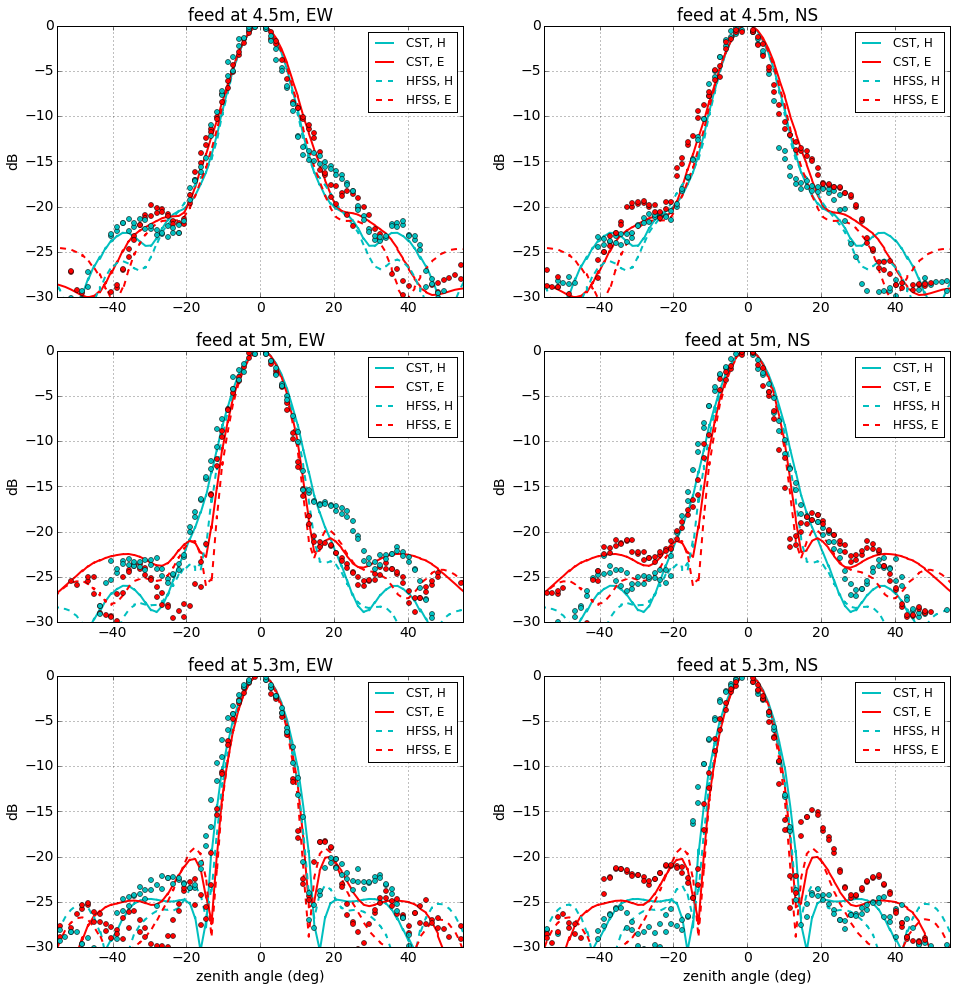

In [22]:
matplotlib.rcParams.update({'font.size': 14})
fig, gridax = plt.subplots(3,2)
fig.set_size_inches((16,16.5))


# 4.5m
plot_slice(richbeam177_hp,richbeam195_hp!=0,gridax[0,0],'ew',addylabel=True,model=True,modelstyle='-',pltlabel='CST',swap=True)
plot_slice(davebeam177_hp,richbeam195_hp!=0,gridax[0,0],'ew',addylabel=True,model=True,modelstyle='--',pltlabel='HFSS',swap=True)
plot_slice(dish1[:,0],dish1[:,0]!=0,gridax[0,0],'ew',addylabel=True)
#plot_airy_beam_with_given_collecting_area(gridax[0,0],73.6)
gridax[0,0].set_title('feed at 4.5m, EW')
gridax[0,0].legend(fontsize=12)
#gridax[0,0].grid()

plot_slice(richbeam177_hp,richbeam195_hp!=0,gridax[0,1],'ns',addylabel=True,model=True,modelstyle='-',pltlabel='CST')
plot_slice(davebeam177_hp,richbeam195_hp!=0,gridax[0,1],'ns',addylabel=True,model=True,modelstyle='--',pltlabel='HFSS')
plot_slice(dish1[:,1],dish1[:,1]!=0,gridax[0,1],'ns')
#plot_airy_beam_with_given_collecting_area(gridax[0,1],73.6)
gridax[0,1].set_title('feed at 4.5m, NS')
gridax[0,1].legend(fontsize=12)
#gridax[0,1].grid()

# 5m
plot_slice(richbeam195_hp,richbeam195_hp!=0,gridax[1,0],'ew',addylabel=True,model=True,modelstyle='-',pltlabel='CST',swap=True)
plot_slice(davebeam195_hp,davebeam195_hp!=0,gridax[1,0],'ew',model=True,modelstyle='--',pltlabel='HFSS',swap=True)
plot_slice(dish2[:,0],dish2[:,0]!=0,gridax[1,0],'ew',addylabel=True)
#plot_airy_beam_with_given_collecting_area(gridax[1,0],82.6)
gridax[1,0].set_title('feed at 5m, EW')
gridax[1,0].legend(fontsize=12)

gridax[1,1].set_title('feed at 5m, NS')
plot_slice(richbeam195_hp,richbeam195_hp!=0,gridax[1,1],'ns',addylabel=True,model=True,modelstyle='-',pltlabel='CST')
plot_slice(davebeam195_hp,davebeam195_hp!=0,gridax[1,1],'ns',model=True,modelstyle='--',pltlabel='HFSS')
#plot_airy_beam_with_given_collecting_area(gridax[1,1],82.6)
plot_slice(dish2[:,1],dish2[:,1]!=0,gridax[1,1],'ns')
gridax[1,1].legend(fontsize=12)


# 5.3m
plot_slice(richbeam208_hp,richbeam208_hp!=0,gridax[2,0],'ew',addylabel=True,model=True,modelstyle='-',pltlabel='CST',swap=True)
plot_slice(davebeam206_hp,davebeam206_hp!=0,gridax[2,0],'ew',model=True,modelstyle='--',pltlabel='HFSS',swap=True)
plot_slice(dish4[:,0],dish4[:,0]!=0,gridax[2,0],'ew',addxlabel=True,addylabel=True)
#plot_airy_beam_with_given_collecting_area(gridax[2,0],97.9)
gridax[2,0].set_title('feed at 5.3m, EW')
gridax[2,0].legend(fontsize=12)

plot_slice(richbeam208_hp,richbeam208_hp!=0,gridax[2,1],'ns',addylabel=True,model=True,modelstyle='-',pltlabel='CST')
plot_slice(davebeam206_hp,davebeam206_hp!=0,gridax[2,1],'ns',model=True,modelstyle='--',pltlabel='HFSS')
plot_slice(dish4[:,1],dish4[:,1]!=0,gridax[2,1],'ns',addxlabel=True)
#plot_airy_beam_with_given_collecting_area(gridax[2,1],97.9)
gridax[2,1].set_title('feed at 5.3m, NS')
gridax[2,1].legend(fontsize=12)

plt.savefig('measured_beams_and_models_slices.pdf',bbox_inches='tight')

# feed measurements

In [6]:
richfeed_hp = 10*log10(genfromtxt('/Users/abrahamn/Documents/MIT/21cm/sat_cal/updates/satcalanalysis/feedModel/FF140Mhz_dipole_only_healpix.txt'))
feed = genfromtxt('/Users/abrahamn/Documents/MIT/21cm/sat_cal/updates/orbcomm_beam_mapping/sat_passes_to_beams/unpolarized_beam_analysis_hera/feed0_nside32_ew_ns.csv',delimiter=',')

In [7]:
feed.shape

(12288, 2)

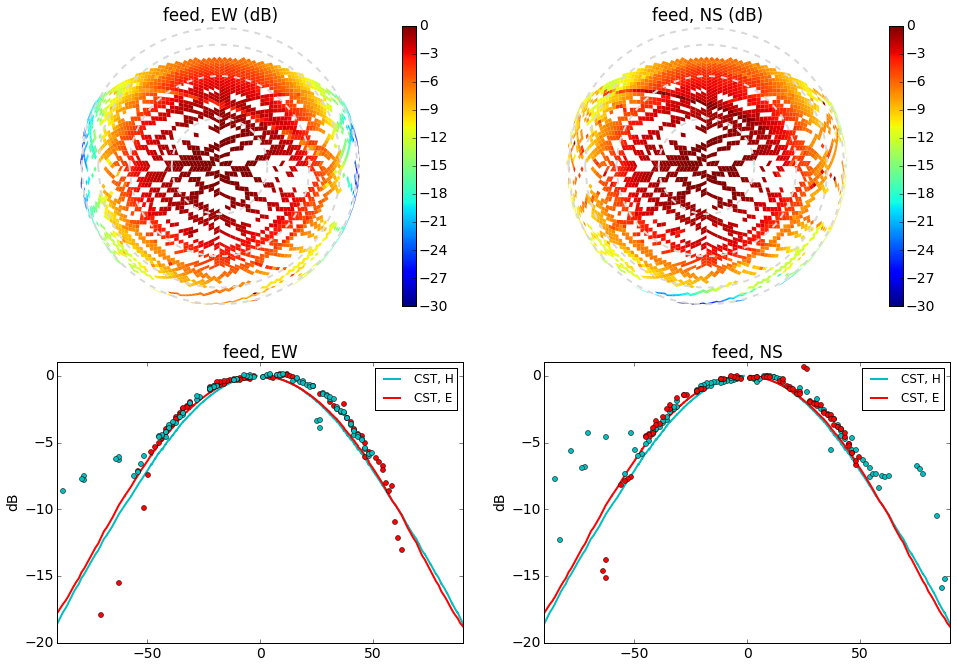

In [13]:
fig, gridax = plt.subplots(2,2)
fig.set_size_inches((16,16.5*.67))

cax=[-30,0]
cm = 'jet'
zacontourcolor = array([0,0,0])+.85

matplotlib.rcParams.update({'font.size': 14})

plot_hpix(feed[:,0],(feed[:,0]!=0)*(feed[:,0]>-35),'feed, EW (dB)',cax,gridax[0,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(feed[:,1],(feed[:,1]!=0)*(feed[:,1]>-35),'feed, NS (dB)',cax,gridax[0,1],cm,hidezalabels=True,contourcolor=zacontourcolor)

plot_slice(richfeed_hp,richfeed_hp!=0,gridax[1,0],'ew',addylabel=True,model=True,modelstyle='-',pltlabel='CST',swap=True)
plot_slice(feed[:,0],feed[:,0]!=0,gridax[1,0],'ew',addylabel=True,ylimits=[-20,1],xlimits=[-90,90])
gridax[1,0].set_title('feed, EW')
gridax[1,0].legend(fontsize=12)

plot_slice(richfeed_hp,richfeed_hp!=0,gridax[1,1],'ns',addylabel=True,model=True,modelstyle='-',pltlabel='CST')
plot_slice(feed[:,1],feed[:,1]!=0,gridax[1,1],'ns',ylimits=[-20,1],xlimits=[-90,90])
gridax[1,1].set_title('feed, NS')
gridax[1,1].legend(fontsize=12)


plt.savefig('feed_plots.pdf',bbox_inches='tight')